<a href="https://colab.research.google.com/github/nishantkapps/aiml-projects/blob/main/AutoEncoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow.python.ops.gen_batch_ops import batch

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import LSTM
from keras.layers import Dropout
from keras.callbacks import EarlyStopping

import cv2

In [ ]:
img = tf.keras.preprocessing.image.load_img('/content/drive/MyDrive/datasets/Bill_Gates.jpg')

In [ ]:
img = tf.keras.preprocessing.image.load_img('/content/drive/MyDrive/datasets/Bill_Gates.jpg', target_size=(256,256))
imgdata = tf.keras.preprocessing.image.img_to_array(img)
imgdata.shape

(256, 256, 3)

In [ ]:
imgarr=imgdata.astype('float32')/255.

In [ ]:
cimg = np.expand_dims(imgarr,axis=0)
cimg.shape

(1, 256, 256, 3)

In [ ]:
# Build the Encoder
enc = Sequential()
enc.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=imgdata.shape))
enc.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), padding='same'))

enc.add(tf.keras.layers.Conv2D(8, (3,3), activation='relu', padding='same'))
enc.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), padding='same'))

enc.add(tf.keras.layers.Conv2D(8, (3,3), activation='relu', padding='same'))
enc.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), padding='same'))

enc.add(tf.keras.layers.Conv2D(8, (3,3), activation='relu', padding='same'))
enc.add(tf.keras.layers.UpSampling2D((2,2)))

enc.add(tf.keras.layers.Conv2D(8, (3,3), activation='relu', padding='same'))
enc.add(tf.keras.layers.UpSampling2D((2,2)))

enc.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same'))
enc.add(tf.keras.layers.UpSampling2D((2,2)))

enc.add(tf.keras.layers.Conv2D(3, (3,3), activation='relu', padding='same'))
enc.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 128, 128, 32)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 128, 128, 8)       2312      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 64, 64, 8)        0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 64, 64, 8)         584       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 32, 32, 8)       

In [ ]:
enc.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [ ]:
enc.fit(cimg, cimg, epochs=5000,)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 167ms/step - loss: 0.0034 - accuracy: 0.9048
Epoch 2502/5000
1/1 [==============================] - 0s 151ms/step - loss: 0.0034 - accuracy: 0.9064
Epoch 2503/5000
1/1 [==============================] - 0s 163ms/step - loss: 0.0034 - accuracy: 0.9047
Epoch 2504/5000
1/1 [==============================] - 0s 163ms/step - loss: 0.0034 - accuracy: 0.9041
Epoch 2505/5000
1/1 [==============================] - 0s 167ms/step - loss: 0.0035 - accuracy: 0.9067
Epoch 2506/5000
1/1 [==============================] - 0s 171ms/step - loss: 0.0035 - accuracy: 0.9065
Epoch 2507/5000
1/1 [==============================] - 0s 161ms/step - loss: 0.0035 - accuracy: 0.9077
Epoch 2508/5000
1/1 [==============================] - 0s 159ms/step - loss: 0.0036 - accuracy: 0.9060
Epoch 2509/5000
1/1 [==============================] - 0s 168ms/step - loss: 0.0035 - accuracy: 0.9050
Epoch 2510/5000
1/1 [=================

In [ ]:
pred = enc.predict(cimg)

In [ ]:
pred.shape

(1, 256, 256, 3)

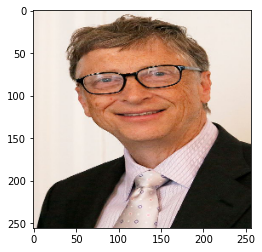

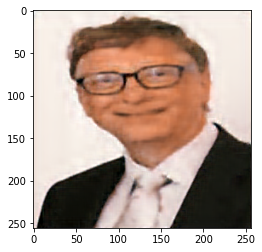

In [ ]:
plt.imshow(img)
plt.show()
plt.imshow(pred[0].reshape(256,256,3))
plt.show()